### 算法得出的结果只能是一种可能性

##### 联合概率：P(xy)
##### 条件概率: P(x|y)
##### 公式: P(y|x)P(x)=P(x|y)P(y)
##### 朴素贝叶斯核心条件：特征之间是有条件独立

##### 朴素贝叶斯不需要建模

In [5]:
# 对于连续性变量
# 1.对于连续性数据进行分箱
# 2.使用函数进行拟合，求解一个函数f(x)

from sklearn.naive_bayes import BernoulliNB #伯努利分布下的朴素贝叶斯
from sklearn.naive_bayes import GaussianNB #高斯分布下的朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB #多项式分布下的朴素贝叶斯
from sklearn.naive_bayes import ComplementNB #补充朴素贝叶斯
from sklearn.linear_model import BayesianRidge #贝叶斯岭回归 


# 样本数量>特征数目
# data.shape[0]>data.shape[1]

# 1.高斯分布下的朴素贝叶斯
# prior :形状为(n_classes,),表示先验概率（P(y)）
# var_smoothing:浮点数，可不填（默认子为=1e-9）
# 安装watermark包

In [7]:
%%cmd
pip install watermark 

Microsoft Windows [版本 10.0.19042.1165]
(c) Microsoft Corporation。保留所有权利。

(torch_qxy) D:\PycharmProjects\pythonProject\DataAnalysis_basic\sklearn>pip install watermark
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4

(torch_qxy) D:\PycharmProjects\pythonProject\DataAnalysis_basic\sklearn>

In [ ]:
# 下述代码执行一次，再次执行使用reload
# 打印配置信息

In [8]:
%load_ext watermark
%watermark -a "QinHsiu" -d -v -m -p numpy,pandas,matplotlib,scipy,sklearn

Author: QinHsiu

Python implementation: CPython
Python version       : 3.7.11
IPython version      : 7.26.0

numpy     : 1.20.3
pandas    : 1.3.2
matplotlib: 3.4.3
scipy     : 1.7.1
sklearn   : 0.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 25 Model 80 Stepping 0, AuthenticAMD
CPU cores   : 16
Architecture: 64bit



In [14]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# 加载数据集
digits=load_digits()
x,y=digits.data,digits.target

# 划分数据
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)

In [18]:
np.unique(y_train) #查看标签

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
gnb=GaussianNB().fit(x_train,y_train) #进行拟合
gnb.score(x_test,y_test) #acc得分
gnb.predict(x_test).shape #预测值大小
gnb.predict_proba(x_test).shape #预测的概率(对应每个标签的概率)
y_pred=gnb.predict(x_test)
prob=gnb.predict_proba(x_test)
prob[1,:].sum() #每一行的概率和为1

1.0

In [33]:
from sklearn.metrics import confusion_matrix as cm #混淆矩阵
cm(y_test,y_pred) #混淆矩阵

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]], dtype=int64)

### 探索高斯贝叶斯擅长的数据集

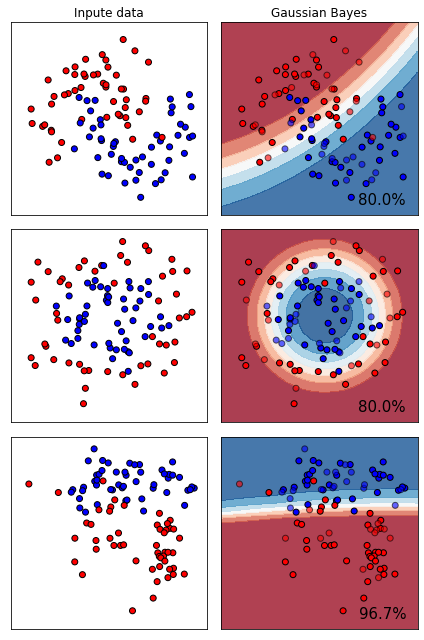

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
from sklearn.preprocessing import StandardScaler #标准化
from sklearn.datasets import make_blobs,make_circles,make_classification,make_moons

h=.02

names=["Mulinomal","Gaussian","Bernoull","Complement"]
classifiers=[MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]

datasets=[make_moons(noise=0.3,random_state=0)
          ,make_circles(noise=0.2,factor=0.5,random_state=1)
          ,make_classification(n_features=2,n_redundant=0,n_informative=2)
         ]


figure=plt.figure(figsize=(6,9))
i=1
for ds_index,ds in enumerate(datasets):
    x,y=ds
    x=StandardScaler().fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)
    
    x1_min,x1_max=x[:,0].min()-.5,x[:,0].max()+.5
    x2_min,x2_max=x[:,1].min()-.5,x[:,1].max()+.5
    array1,array2=np.meshgrid(np.arange(x1_min,x1_max,0.2)
                              ,np.arange(x2_min,x2_max,0.2))
    
    cm=plt.cm.RdBu
    cm_bright=ListedColormap(["#FF0000","#0000FF"])
    
    ax=plt.subplot(len(datasets),2,i)
    if ds_index==0:
        ax.set_title("Inpute data")
    
    ax.scatter(x_train[:,0],x_train[:,1],c=y_train
               ,cmap=cm_bright,edgecolors="k")
    ax.scatter(x_test[:,0],x_test[:,1],c=y_test
              ,cmap=cm_bright,edgecolors="k")
    
    ax.set_xlim(array1.min(),array1.max())
    ax.set_ylim(array2.min(),array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i+=1
    ax=plt.subplot(len(datasets),2,i)

    clf=GaussianNB().fit(x_train,y_train)
    score=clf.score(x_test,y_test)

    z=clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:,1]
    z=z.reshape(array1.shape)

    ax.contourf(array1,array2,z,cmap=cm,alpha=0.8)

    ax.scatter(x_train[:,0],x_train[:,1],c=y_train
               ,cmap=cm_bright,edgecolors="k")
    ax.scatter(x_test[:,0],x_test[:,1],c=y_test
              ,cmap=cm_bright,edgecolors="k",alpha=0.6)

    ax.set_xlim(array1.min(),array1.max())
    ax.set_ylim(array2.min(),array2.max())
    ax.set_xticks([])
    ax.set_yticks([])

    if ds_index==0:
        ax.set_title("Gaussian Bayes")

    ax.text(array1.max()-.3,array2.min()+.3,("{:.1f}%".format(score*100)),size=15
            ,horizontalalignment="right")
    i+=1
plt.tight_layout()
plt.show()

Naive Bayes:00:01:412404
DecisionTree:00:00:843681
SVM,BRF kernel:00:04:762417
RandomForeset:00:05:939512
Logistic:00:05:467181


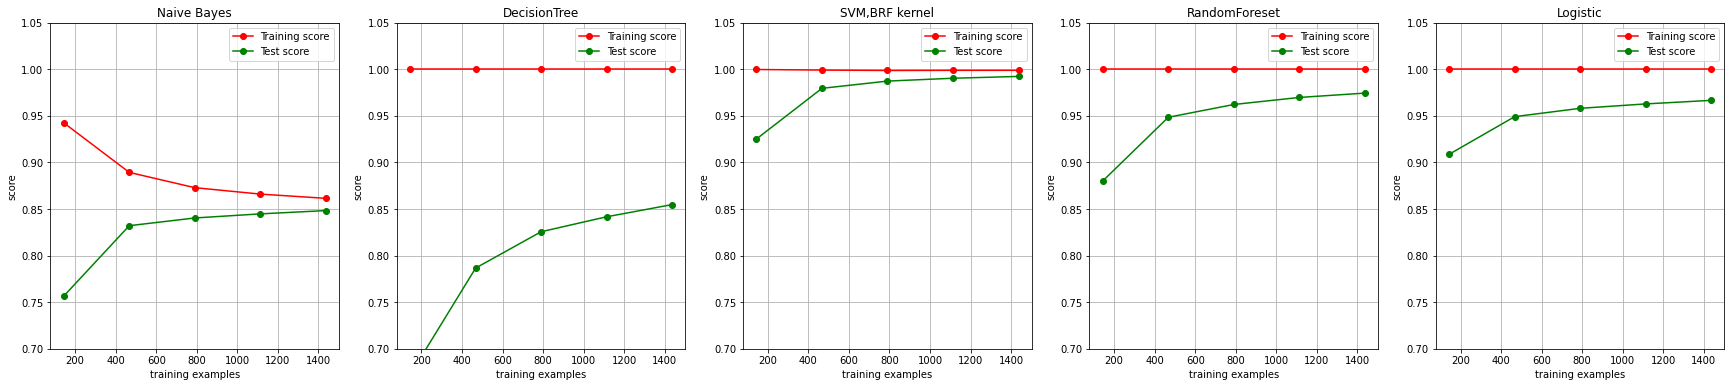

In [75]:
# 比较高斯朴素贝叶斯的拟合效果
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR

from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from time import time
import datetime

# 定义绘制曲线的函数
# 一次画出所有模型的学习曲线
def plot_learning_curve(estimator,title,x,y
                        ,ax #选择子图
                        ,ylim=None #设置纵坐标
                        ,cv=None #交叉验证
                        ,n_jobs=None #设置线程数目
                       ):
    train_size,train_scores,test_scores=learning_curve(estimator,x,y
                                                       ,cv=cv
                                                      ,n_jobs=n_jobs #工作的线程数
                                                      )
    # 返回每次建模时样本数量，训练集得分，测试集得分（每次交叉验证）
    ax.set_title(title)
    if ylim!=None:
        ax.set_ylim(*ylim)#纵坐标（设置同一量纲进行比较）
    ax.set_xlabel("training examples")
    ax.set_ylabel("score")
    ax.grid() #显示网格作为背景
    ax.plot(train_size,np.mean(train_scores,axis=1),'o-'
           ,color="r",label="Training score")
    ax.plot(train_size,np.mean(test_scores,axis=1),'o-' #带点直线
           ,color="g",label="Test score")
    ax.legend()
    return ax

digits=load_digits() #加载数据集
x,y=digits.data,digits.target

title=["Naive Bayes","DecisionTree","SVM,RBF kernel","RandomForeset","Logistic"]
model=[GaussianNB(),DTC(),SVC(gamma=0.001,kernel="rbf"),RFC(n_estimators=50),LR(C=1,solver="lbfgs")]
cv=ShuffleSplit(n_splits=50 #数据划分，每次进行划分成50份
                ,test_size=0.2
                ,random_state=0)

fig,ax=plt.subplots(1,5,figsize=(30,6)) #生成了一行具有五个子图的画布

for ind,title_,estimator in zip(range(len(title)),title,model):
    begin=time()
    plot_learning_curve(estimator #不同分类器
                        ,title_ #标题
                        ,x,y
                        ,ax=ax[ind] #子图的位置
                        ,ylim=[0.7,1.05]
                        ,n_jobs=4,cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f")))
plt.show()

##### 所有模型都存在过拟合问题：训练集得分好于测试集得分

### 布里尔分数，score=(1/n)sum((p-o)^2)
##### p:朴素贝叶斯预测出的概率
##### o:样本所对应的真实结果
##### 取值范围为0~1

In [122]:
# 加载数据集
digits=load_digits()
x,y=digits.data,digits.target

# 划分数据
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)

gnb=GaussianNB().fit(x_train,y_train) #进行拟合
gnb.score(x_test,y_test) #acc得分
gnb.predict(x_test).shape #预测值大小
gnb.predict_proba(x_test).shape #预测的概率(对应每个标签的概率)
y_pred=gnb.predict(x_test)
prob=gnb.predict_proba(x_test)
prob[1,:].sum() #每一行的概率和为1


y_test_=y_test.copy()
y_test_=pd.get_dummies(y_test_) #变为哑变量

from sklearn.metrics import brier_score_loss as BS
for i in range(10):
    bs =BS(y_test_[i],prob[:,i],pos_label=i)
    print("%d bs is %.4f"%(i,bs)) #打印数字的布里尔分数

0 bs is 0.9962
1 bs is 0.0326
2 bs is 0.0733
3 bs is 0.0807
4 bs is 0.0751
5 bs is 0.1109
6 bs is 0.0959
7 bs is 0.1280
8 bs is 0.1587
9 bs is 0.0789


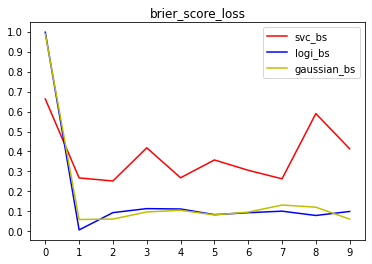

In [144]:
# 比较几种模型的布里尔分数
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss as BS
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd

data=load_digits()
x,y=data.data,data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

logi=LR(C=1.,solver="lbfgs",max_iter=3000,multi_class="auto").fit(x_train,y_train)
svc=SVC(kernel="linear",gamma=1).fit(x_train,y_train)
gaussianNB=GaussianNB().fit(x_train,y_train)

# 对于测试集作哑变量处理
y_test_=y_test.copy()
y_test_=pd.get_dummies(y_test_) #变为哑变量


#将svc的置信度压缩至0~1
svc_prob=(svc.decision_function(x_test)-svc.decision_function(x_test).min())/(svc.decision_function(x_test).max()-svc.decision_function(x_test).min())
logi_prob=logi.predict_proba(x_test)
gaussianNB_prob=gaussianNB.predict_proba(x_test)

#将三者得分打包，绘制图像
svc_bs=[]
logi_bs=[]
gaussian_bs=[]

for i in range(10):
    svc_bs.append(BS(y_test_[i],svc_prob[:,i],pos_label=i))
    logi_bs.append(BS(y_test_[i],logi_prob[:,i],pos_label=i))
    #BS(y_test_[i],prob[:,i],pos_label=i)
    gaussian_bs.append(BS(y_test_[i],gaussianNB_prob[:,i],pos_label=i))
    

model=[svc_bs,logi_bs,gaussian_bs]
title=["svc_bs","logi_bs","gaussian_bs"]
color=["r","b","y"]

for m in range(len(model)):
    plt.plot(range(10),model[m],c=color[m],label=title[m])

plt.legend()
plt.xticks(range(10))
plt.yticks([i/10 for i in range(11)])
plt.title("brier_score_loss")
plt.show()


### 对数似然函数Log_loss
##### 对数似然函数与逻辑回归的对数损失函数一样

In [140]:
from sklearn.metrics import log_loss
# 第一个参数是真是标签，第二个参数是我们预测的概率，可以使用shift+tab查看函数参数

log_loss(y_test,logi_prob) #逻辑回归的对数损失

0.11998574697673445

In [141]:
log_loss(y_test,svc_prob)

1.6088536689575936

In [143]:
log_loss(y_test,gaussianNB_prob)

3.120637188327438

##### 现实往往使用对数似然函数（会偏向于有梯度下降求解最优化的模型）
##### 争对多个模型优先使用对数似然
##### 概率接近于0或1使用对数似然，可以取到0或1使用布里尔分数



### 可靠性曲线(概率校准曲线)

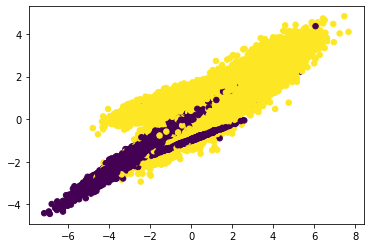

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as MC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

# 自建数据集
n=100000 #样本数目
m=20 #特征数目
x,y=MC(n_samples=n,n_features=m
       ,n_classes=2 #类别
       ,n_informative=2 #其中两个代表较多的信息
       ,n_redundant=10 #10个是冗余特征
       ,random_state=1
      )
plt.scatter(x[:,0],x[:,1],c=y,s=30)
plt.show()


# 对数据进行切分
# 用0.01的数据进行训练
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.99,random_state=1)

# 高斯贝叶斯
gnb=GaussianNB().fit(x_train,y_train)
ganb_ypred=gnb.predict(x_test)
gnb_prob=gnb.predict_proba(x_test)

# 支持向量机
svc=SVC(kernel="linear",gamma=1).fit(x_train,y_train)
svc_ypred=svc.predict(x_test)
svc_prob=(svc.decision_function(x_test)-svc.decision_function(x_test).min())/(svc.decision_function(x_test).max()-svc.decision_function(x_test).min())

# 逻辑回归
logi=LR(C=1.,solver="lbfgs",max_iter=3000,multi_class="auto").fit(x_train,y_train)
logi_ypred=logi.predict(x_test)
logi_prob=logi.predict_proba(x_test)

### 绘制错误的图形

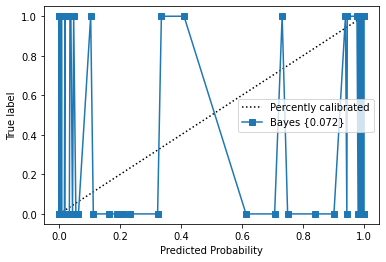

1


In [198]:
# gnb.predict_proba(x_test)[:,1] 预测概率，很坐标
# y_test 真实标签，横坐标
from sklearn.metrics import brier_score_loss as BS

# 对于测试集作哑变量处理
y_test_=y_test.copy()
y_test_=pd.get_dummies(y_test_) #变为哑变量




df=pd.DataFrame({"y_true":y_test[:500],"y_prob":gnb_prob[:,1][:500]})
df=df.sort_values(by="y_prob") #按照预测概率进行排序
df.index=range(df.shape[0]) #修改索引

# 绘制图形
fig=plt.figure()
ax1=plt.subplot()
ax1.plot([0,1],[0,1]
         ,"k:" #设置样式
         ,label="Percently calibrated") #对角线
ax1.plot(df["y_prob"],df["y_true"]
         ,"s-" #用小方块表示点，进行连接
         ,label="%s {%1.3f}"%("Bayes",BS(y_test_[1],gnb_prob[:,1],pos_label=y.max())))
ax1.set_ylabel("True label")
ax1.set_xlabel("Predicted Probability")
ax1.set_ylim([-0.05,1.05])
ax1.legend()
plt.show()

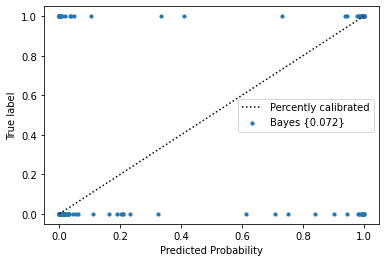

In [199]:
# 绘制散点图
fig=plt.figure()
ax1=plt.subplot()
ax1.plot([0,1],[0,1],"k:",label="Percently calibrated") #对角线
ax1.scatter(df["y_prob"],df["y_true"]
         ,s=10
         ,label="%s {%1.3f}"%("Bayes",BS(y_test_[1],gnb_prob[:,1],pos_label=y.max())))
ax1.set_ylabel("True label")
ax1.set_xlabel("Predicted Probability")
ax1.set_ylim([-0.05,1.05])
ax1.legend()
plt.show()

### 绘制正确的图形
##### 对数据进行分箱，求出每个分箱中真实标签的概率和预测1概率

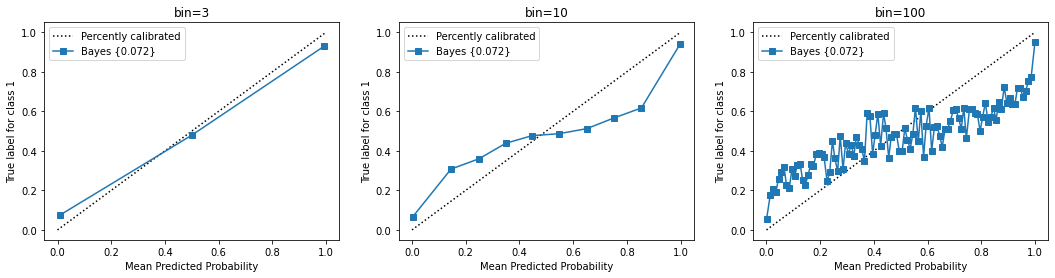

In [200]:
# 使用类callibration_curve获取分箱后的概率
# 参数有
# y_true,y_prob真实标签和预测的概或者置信度
# normalize 标准化，默认为False
# n_bins 分箱的箱数

# 返回值
# trueproba 可靠性曲线的纵坐标,结构为(n_bins,)，是每个箱子中少数类y=1类的比例
# predproba 可靠性曲线的横坐标,结构为(n_bins,)，是每个箱子中概率的均值

from sklearn.calibration import calibration_curve



# 绘制图形，观察箱数对结果的影响

fig,axes=plt.subplots(1,3,figsize=(18,4)) #一行三列的子图
bins=[3,10,100]
for ind,bin in enumerate(bins):
    trueprob,predprob=calibration_curve(y_test
                                    ,gnb_prob[:,1]
                                    ,n_bins=bin #箱子数
                                   )
    ax=axes[ind]
    ax.plot([0,1],[0,1]
             ,"k:" #设置样式
             ,label="Percently calibrated") #对角线
    ax.plot(predprob,trueprob
             ,"s-" #用小方块表示点，进行连接
             ,label="%s {%1.3f}"%("Bayes",BS(y_test_[1],gnb_prob[:,1],pos_label=y.max())))
    ax.set_ylabel("True label for class 1")
    ax.set_xlabel("Mean Predicted Probability")
    ax.set_ylim([-0.05,1.05])
    ax.set_title("bin=%d"%(bin))
    ax.legend()
plt.show()

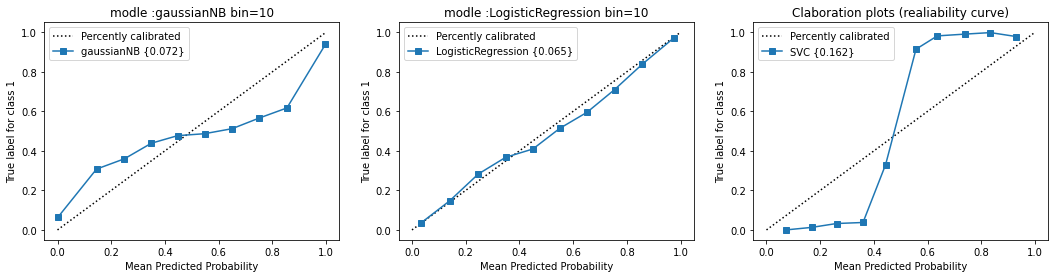

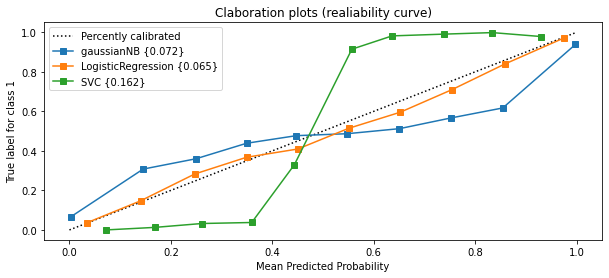

对于概率校准曲线呈现sigmoid函数形状，表明数据集中的特征不是相互条件独立的
大量数据集中在决策边界附近，因此许多置信度靠经0.5左右，即使决策边界能够将样本点判断正确，模型本身对这个结果也是不确定的


In [226]:
# 使用不同模型
# 对于测试集作哑变量处理
y_test_=y_test.copy()
y_test_=pd.get_dummies(y_test_) #变为哑变量


# 高斯贝叶斯
gnb=GaussianNB().fit(x_train,y_train)
ganb_ypred=gnb.predict(x_test)
gnb_prob=gnb.predict_proba(x_test)

# 支持向量机
svc=SVC(kernel="linear",gamma=1).fit(x_train,y_train)
svc_ypred=svc.predict(x_test)
svc_prob=(svc.decision_function(x_test)-svc.decision_function(x_test).min())/(svc.decision_function(x_test).max()-svc.decision_function(x_test).min())

# 逻辑回归
logi=LR(C=1.,solver="lbfgs",max_iter=3000,multi_class="auto").fit(x_train,y_train)
logi_ypred=logi.predict(x_test)
logi_prob=logi.predict_proba(x_test)

fig,axes=plt.subplots(1,3,figsize=(18,4)) #一行三列的子图
model=[gnb_prob,logi_prob,svc_prob]
names=["gaussianNB","LogisticRegression","SVC"]

# 使用函数查看接口
# if hasattr(modle,"predict_proba"):
# else:
# 绘制三个图形
for ind,m in enumerate(model):
    # 注意svc使用的是置信度，因此claboration的预测值的该路参数与其他模型不同
    if ind==2:
        trueprob,predprob=calibration_curve(y_test
                                    ,m
                                    ,n_bins=10 #箱子数
                                    )
        ms_score=BS(y_test_[1],m,pos_label=y.max())
    else:
        trueprob,predprob=calibration_curve(y_test
                                    ,m[:,1]
                                    ,n_bins=10 #箱子数
                                    )
        ms_score=BS(y_test_[1],m[:,1],pos_label=y.max())
    ax=axes[ind]
    ax.plot([0,1],[0,1]
             ,"k:" #设置样式
             ,label="Percently calibrated") #对角线
    ax.plot(predprob,trueprob
             ,"s-" #用小方块表示点，进行连接
             ,label="%s {%1.3f}"%(names[ind],ms_score))

    ax.set_ylabel("True label for class 1")
    ax.set_xlabel("Mean Predicted Probability")
    ax.set_ylim([-0.05,1.05])
    ax.set_title("modle :%s bin=%d"%(names[ind],10))
    ax.legend()
plt.title("Claboration plots (realiability curve)")
plt.show()


# 绘制一个图形
fig,ax=plt.subplots(1,1,figsize=(10,4)) #一行三列的子图
ax.plot([0,1],[0,1]
             ,"k:" #设置样式
             ,label="Percently calibrated") #对角线
for ind,m in enumerate(model):
    # 注意svc使用的是置信度，因此claboration的预测值的该路参数与其他模型不同
    if ind==2:
        trueprob,predprob=calibration_curve(y_test
                                    ,m
                                    ,n_bins=10 #箱子数
                                    )
        ms_score=BS(y_test_[1],m,pos_label=y.max())
    else:
        trueprob,predprob=calibration_curve(y_test
                                    ,m[:,1]
                                    ,n_bins=10 #箱子数
                                    )
        ms_score=BS(y_test_[1],m[:,1],pos_label=y.max())

    ax.plot(predprob,trueprob
             ,"s-" #用小方块表示点，进行连接
             ,label="%s {%1.3f}"%(names[ind],ms_score))

ax.set_ylabel("True label for class 1")
ax.set_xlabel("Mean Predicted Probability")
ax.set_ylim([-0.05,1.05])
ax.set_title("Claboration plots (realiability curve)")
ax.legend()

plt.show()

print("对于概率校准曲线呈现sigmoid函数形状，表明数据集中的特征不是相互条件独立的。")
print("大量数据集中在决策边界附近，因此许多置信度靠经0.5左右，即使决策边界能够将样本点判断正确，模型本身对这个结果也是不确定的")


### 绘制预测概率的直方图观察


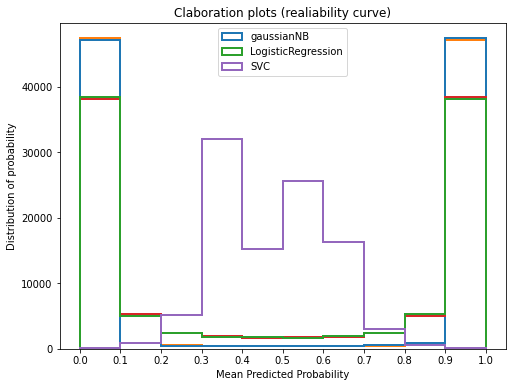

In [237]:
# 高斯贝叶斯
gnb=GaussianNB().fit(x_train,y_train)
ganb_ypred=gnb.predict(x_test)
gnb_prob=gnb.predict_proba(x_test)

# 支持向量机
svc=SVC(kernel="linear",gamma=1).fit(x_train,y_train)
svc_ypred=svc.predict(x_test)
svc_prob=(svc.decision_function(x_test)-svc.decision_function(x_test).min())/(svc.decision_function(x_test).max()-svc.decision_function(x_test).min())

# 逻辑回归
logi=LR(C=1.,solver="lbfgs",max_iter=3000,multi_class="auto").fit(x_train,y_train)
logi_ypred=logi.predict(x_test)
logi_prob=logi.predict_proba(x_test)

model=[gnb_prob,logi_prob,svc_prob]
names=["gaussianNB","LogisticRegression","SVC"]
fig,ax=plt.subplots(figsize=(8,6))

for ind,m in enumerate(model):
    ax.hist(m
            ,bins=10
            ,label=names[ind]
            ,histtype="step" #设置直方图为透明
            ,lw=2 #设置直方图柱子宽度
    )
   
 
ax.set_ylabel("Distribution of probability")
ax.set_xlabel("Mean Predicted Probability")
ax.set_xlim([-0.05,1.05])
ax.set_xticks([i/10 for i in range(11)])
ax.set_title("Claboration plots (realiability hist)")
ax.legend(loc=9)

plt.show()


### 矫正可靠性曲线

##### 使用CalibrationclassifierCV进行矫正


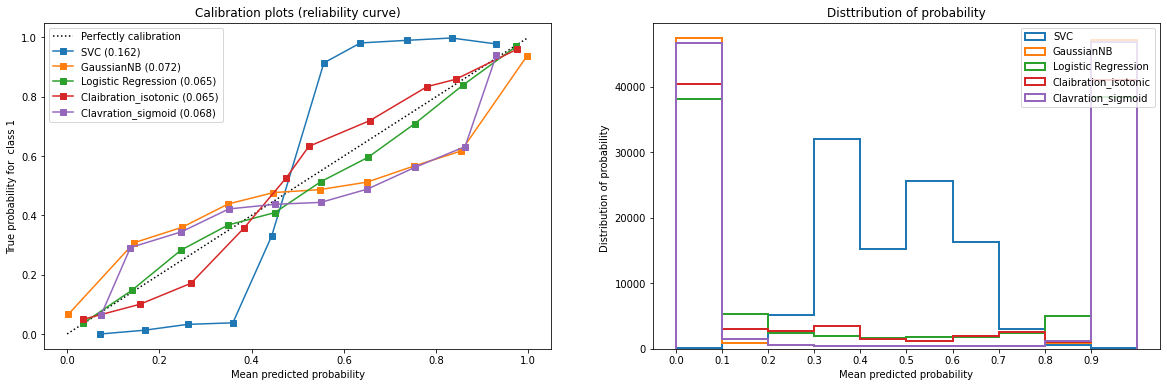

In [255]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV

# 高斯贝叶斯
gnb=GaussianNB().fit(x_train,y_train)
ganb_ypred=gnb.predict(x_test)
gnb_prob=gnb.predict_proba(x_test)

# 支持向量机
svc=SVC(kernel="linear",gamma=1).fit(x_train,y_train)
svc_ypred=svc.predict(x_test)
svc_prob=(svc.decision_function(x_test)-svc.decision_function(x_test).min())/(svc.decision_function(x_test).max()-svc.decision_function(x_test).min())

# 逻辑回归
logi=LR(C=1.,solver="lbfgs",max_iter=3000,multi_class="auto").fit(x_train,y_train)
logi_ypred=logi.predict(x_test)
logi_prob=logi.predict_proba(x_test)


models=[SVC(kernel="linear",gamma=1),GaussianNB()
        ,LR(C=1.,solver="lbfgs",max_iter=3000,multi_class="auto")
       ,CalibratedClassifierCV(GaussianNB(),cv=2,method="isotonic")
       ,CalibratedClassifierCV(GaussianNB(),cv=2,method="sigmoid")]
name=["SVC","GaussianNB","Logistic Regression","Claibration_isotonic","Clavration_sigmoid"]

# 将绘制可靠性曲线和直方图的代码打包
def plot_calib(x_train,x_test,y_train,y_test,models,name,n_bins=10):
    # 创建画布
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
    ax1.plot([0,1],[0,1],"k:",label="Perfectly calibration")
    
    # 对于测试集转哈为哑变量
    y_test_=y_test.copy()
    y_test_=pd.get_dummies(y_test_) #变为哑变量
    for clf,name_ in zip(models,name):
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        
        if hasattr(clf,"predict_proba"):
            prob_pos=clf.predict_proba(x_test)[:,1]
            # 返回布里尔分数
            clf_score=brier_score_loss(y_test_[1],prob_pos,pos_label=1)
        else:
            prob_pos=clf.decision_function(x_test)
            prob_pos=(prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())
            # 返回布里尔分数
            clf_score=brier_score_loss(y_test_[1],prob_pos,pos_label=1)
     
        trueproba,predproba=calibration_curve(y_test,prob_pos,n_bins=n_bins)
        ax1.plot(predproba,trueproba,"s-",label="%s (%1.3f)"%(name_,clf_score))
        ax2.hist(prob_pos,range=(0,1),bins=n_bins,label=name_,histtype="step",lw=2)
        
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_ylabel("Distribution of probability ")
    ax2.set_xlim([-0.05,1.05])
    ax2.set_xticks([i/10 for i in range(10)])
    ax2.legend()
    ax2.set_title("Disttribution of probability")
    ax1.set_ylabel("True probability for  class 1")
    ax1.set_xlabel("Mean predicted probability")
    ax1.set_ylim([-0.05,1.05])
    ax1.set_title("Calibration plots (reliability curve)")
    ax1.legend()
    plt.show()

plot_calib(x_train,x_test,y_train,y_test,models,name,n_bins=10)
        

In [256]:
# 查看得分(准确度)
gnb=GaussianNB().fit(x_train,y_train)
gnb.score(x_test,y_test)

0.9208686868686868

In [268]:
# 查看布利尔分数
# 对于测试集转哈为哑变量
y_test_=y_test.copy()
y_test_=pd.get_dummies(y_test_) #变为哑变量
brier_score_loss(y_test_[1],gnb.predict_proba(x_test)[:,1],pos_label=1)

0.07151730170880724

In [269]:
# 进行矫正
from sklearn.calibration import CalibratedClassifierCV

gnb_isotonic=CalibratedClassifierCV(gnb,cv=2,method="isotonic").fit(x_train,y_train)
gnb_isotonic.score(x_test,y_test)

0.9193838383838384

In [270]:
# 查看布利尔分数
brier_score_loss(y_test_[1],gnb_isotonic.predict_proba(x_test)[:,1],pos_label=1)

0.0654663116515774

In [271]:
# 进行矫正
from sklearn.calibration import CalibratedClassifierCV

gnb_sigmoid=CalibratedClassifierCV(gnb,cv=2,method="sigmoid").fit(x_train,y_train)
gnb_sigmoid.score(x_test,y_test)

0.9208383838383838

In [272]:
# 查看布利尔分数
brier_score_loss(y_test_[1],gnb_sigmoid.predict_proba(x_test)[:,1],pos_label=1)

0.06841360664146949

### 在现实生活中，当准确率与概率相悖时，以准确率为准

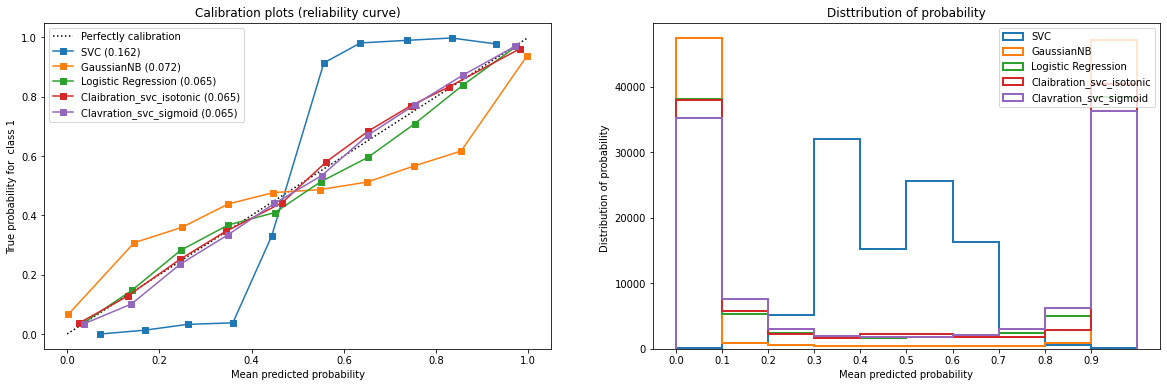

In [273]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV #概率校准

# 高斯贝叶斯
gnb=GaussianNB().fit(x_train,y_train)
ganb_ypred=gnb.predict(x_test)
gnb_prob=gnb.predict_proba(x_test)

# 支持向量机
svc=SVC(kernel="linear",gamma=1).fit(x_train,y_train)
svc_ypred=svc.predict(x_test)
svc_prob=(svc.decision_function(x_test)-svc.decision_function(x_test).min())/(svc.decision_function(x_test).max()-svc.decision_function(x_test).min())

# 逻辑回归
logi=LR(C=1.,solver="lbfgs",max_iter=3000,multi_class="auto").fit(x_train,y_train)
logi_ypred=logi.predict(x_test)
logi_prob=logi.predict_proba(x_test)


models=[SVC(kernel="linear",gamma=1),GaussianNB()
        ,LR(C=1.,solver="lbfgs",max_iter=3000,multi_class="auto")
       ,CalibratedClassifierCV(SVC(kernel="linear",gamma=1),cv=2,method="isotonic")
       ,CalibratedClassifierCV(SVC(kernel="linear",gamma=1),cv=2,method="sigmoid")]
name=["SVC","GaussianNB","Logistic Regression","Claibration_svc_isotonic","Clavration_svc_sigmoid"]

# 将绘制可靠性曲线和直方图的代码打包
def plot_calib(x_train,x_test,y_train,y_test,models,name,n_bins=10):
    # 创建画布
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,6))
    ax1.plot([0,1],[0,1],"k:",label="Perfectly calibration")
    
    # 对于测试集转哈为哑变量
    y_test_=y_test.copy()
    y_test_=pd.get_dummies(y_test_) #变为哑变量
    for clf,name_ in zip(models,name):
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        
        if hasattr(clf,"predict_proba"):
            prob_pos=clf.predict_proba(x_test)[:,1]
            # 返回布里尔分数
            clf_score=brier_score_loss(y_test_[1],prob_pos,pos_label=1)
        else:
            prob_pos=clf.decision_function(x_test)
            prob_pos=(prob_pos-prob_pos.min())/(prob_pos.max()-prob_pos.min())
            # 返回布里尔分数
            clf_score=brier_score_loss(y_test_[1],prob_pos,pos_label=1)
     
        trueproba,predproba=calibration_curve(y_test,prob_pos,n_bins=n_bins)
        ax1.plot(predproba,trueproba,"s-",label="%s (%1.3f)"%(name_,clf_score))
        ax2.hist(prob_pos,range=(0,1),bins=n_bins,label=name_,histtype="step",lw=2)
        
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_ylabel("Distribution of probability ")
    ax2.set_xlim([-0.05,1.05])
    ax2.set_xticks([i/10 for i in range(10)])
    ax2.legend()
    ax2.set_title("Disttribution of probability")
    ax1.set_ylabel("True probability for  class 1")
    ax1.set_xlabel("Mean predicted probability")
    ax1.set_ylim([-0.05,1.05])
    ax1.set_title("Calibration plots (reliability curve)")
    ax1.legend()
    plt.show()

plot_calib(x_train,x_test,y_train,y_test,models,name,n_bins=10)
        

### 多项式朴素贝叶斯
##### 多项式分布擅长分类型变量
##### alpha=1:拉普拉斯平滑，alpha用以防止训练集中出现一些测试集中没有出现的样例（导致分母为0）
##### alpha<1:利德斯通平滑

In [319]:
from sklearn.naive_bayes import MultinomialNB #多项式贝叶斯
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss
from sklearn.datasets import make_blobs

# 建立数据集
class_1=500
class_2=500
centers=[[0.0,0.0],[2.0,2.0]]
cluster_std=[0.5,0.5] #设置类别方差
x,y=make_blobs(n_samples=[class_1,class_2],centers=centers
               ,cluster_std=cluster_std
              ,random_state=0
              ,shuffle=False)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)

# 归一化:保证输入多项式朴素贝叶斯的特征矩阵不含负数
# 使用训练集进行拟合
mms=MinMaxScaler().fit(x_train)
x_train_=mms.transform(x_train)
x_test_=mms.transform(x_test)

# 建模进行实例化
mnb=MultinomialNB().fit(x_train_,y_train)

# 重要属性，每个标签类的对数先验概率(log(p(y))),概率在[0,1]，故为负数
mnb.class_log_prior_ 

array([-0.69029411, -0.69600841])

In [293]:
(y_train==1).sum()/y_train.shape[0] #查看类别1在训练集中所占比例

0.49857142857142855

In [295]:
# 使用exp查看真实概率
np.exp(mnb.class_log_prior_) #所占比例

array([0.50142857, 0.49857143])

In [296]:
# 重要属性：返回一个固定标签类别下的每个特征的对数概率
mnb.feature_log_prob_ 

array([[-0.76164788, -0.62903951],
       [-0.72500918, -0.6622691 ]])

In [298]:
# 重要属性，在fit时每个标签类别下包含的样本数
# 当fit接口中的sample_weight被设置时，该接口返回的值受到影响
mnb.class_count_ 

array([351., 349.])

In [304]:
# 分类器效果
mnb.predict_proba(x_test_) #预测概率
mnb.score(x_test_,y_test) #得分，准确率
# 对于多分类，需要对y_test进行转换哑变量处理
# y_test_=y_test.copy()
# y_test_=pd.get_dummies(y_test_)
brier_score_loss(y_test,mnb.predict_proba(x_test_)[:,1],pos_label=1) #布里尔分数（二分类）

0.24977828412546035

In [312]:
# 尝试把x_train看作分类型变量
# x_train没有经过归一化,因为做哑变量之后自然所有的数据就不回为负了
from sklearn.preprocessing import KBinsDiscretizer 
kbs=KBinsDiscretizer(n_bins=10,encode="onehot").fit(x_train) #独热编码

x_train_=kbs.transform(x_train)
x_test_=kbs.transform(x_test)

mnb=MultinomialNB().fit(x_train_,y_train)
mnb.score(x_test_,y_test)

0.9966666666666667

In [313]:
brier_score_loss(y_test,mnb.predict_proba(x_test_)[:,1],pos_label=1) #布里尔分数

0.0014593932778211862

### 伯努利朴素贝叶斯（二项分布）


In [320]:
from sklearn.naive_bayes import BernoulliNB
# 二值化参数binarize 阈值
# fit_prior x先验概率

# 归一化
mms=MinMaxScaler().fit(x_train)
x_train_=mms.transform(x_train)
x_test_=mms.transform(x_test)

# 不设置二值化（保持原状）
bnl_=BernoulliNB().fit(x_train_,y_train)
bnl_.score(x_test_,y_test)

0.49666666666666665

In [324]:
brier_score_loss(y_test,bnl_.predict_proba(x_test_)[:,1],pos_label=1)

0.25000009482193225

In [332]:
# 可以使用预处理模块的函数来进行二值化
from sklearn.preprocessing import Binarizer #效率较低

# 设置二值化（使用阈值进行二分类）
bnl=BernoulliNB(binarize=0.5).fit(x_train_,y_train)
bnl.score(x_test_,y_test)

0.9833333333333333

In [330]:
brier_score_loss(y_test,bnl.predict_proba(x_test_)[:,1],pos_label=1)

0.010405875827339534

### 处理贝叶斯的样本不平衡问题

In [346]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC


# 创建数据集
class_1=50000
class_2=500

centers=[[0.0,0.0],[2,2]]
cluster_std=[3,1]

x,y=make_blobs(n_samples=[class_1,class_2]
               ,centers=centers
              ,cluster_std=cluster_std
               ,shuffle=False
              ,random_state=420)



# 打包模型
names=["GaussianNB","BernoulliNB","MultinomialNB"]
models=[GaussianNB(),BernoulliNB(),MultinomialNB()]

for  name,clf in zip(names,models):
    # 划分测试集和训练集
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
    # 预处理(进行二值化处理)
    if name !="GaussianNB":
        kbs=KBinsDiscretizer(n_bins=10,encode="onehot").fit(x_train)
        x_train=kbs.transform(x_train)
        x_test=kbs.transform(x_test)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    recall=recall_score(y_test,y_pred)
    bs=BS(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    score=clf.score(x_test,y_test)
    auc=AUC(y_test,y_pred)
    print("%s"%name)
    print("\tBrier:{:.3f}".format(bs))
    print("\trecall:{:.3f}".format(recall))
    print("\tscore:{:.3f}".format(score))
    print("\tauc:{:.3f}".format(auc))

GaussianNB
	Brier:0.009
	recall:0.000
	score:0.990
	auc:0.500
BernoulliNB
	Brier:0.009
	recall:0.000
	score:0.990
	auc:0.500
MultinomialNB
	Brier:0.009
	recall:0.000
	score:0.990
	auc:0.500


### 补集朴素贝叶斯


In [351]:
from sklearn.naive_bayes import ComplementNB #适用于样本不均衡的数据集
# 参数norm是否需要进行L2范式进行规范化，默认为False
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC
from time import time
import datetime

# 创建数据集
class_1=50000
class_2=500

centers=[[0.0,0.0],[2,2]]
cluster_std=[3,1]

x,y=make_blobs(n_samples=[class_1,class_2]
               ,centers=centers
              ,cluster_std=cluster_std
               ,shuffle=False
              ,random_state=420)



# 打包模型
names=["GaussianNB","BernoulliNB","MultinomialNB","ComplementNB"]
models=[GaussianNB(),BernoulliNB(),MultinomialNB(),ComplementNB()]

for  name,clf in zip(names,models):
    # 划分测试集和训练集
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
    # 预处理(进行二值化处理)
    if name !="GaussianNB":
        kbs=KBinsDiscretizer(n_bins=10,encode="onehot").fit(x_train)
        x_train=kbs.transform(x_train)
        x_test=kbs.transform(x_test)
    begin=time()
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    recall=recall_score(y_test,y_pred)
    bs=BS(y_test,clf.predict_proba(x_test)[:,1],pos_label=1)
    score=clf.score(x_test,y_test)
    auc=AUC(y_test,y_pred)
    print("%s"%name)
    print("\tBrier:{:.4f}".format(bs))
    print("\trecall:{:.4f}".format(recall))
    print("\tscore:{:.4f}".format(score))
    print("\tauc:{:.4f}".format(auc))
    print("time cost:",datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))


GaussianNB
	Brier:0.0093
	recall:0.0000
	score:0.9900
	auc:0.5000
time cost: 00:00:011002
BernoulliNB
	Brier:0.0095
	recall:0.0000
	score:0.9900
	auc:0.5000
time cost: 00:00:010002
MultinomialNB
	Brier:0.0094
	recall:0.0000
	score:0.9900
	auc:0.5000
time cost: 00:00:009002
ComplementNB
	Brier:0.1259
	recall:0.8947
	score:0.8244
	auc:0.8592
time cost: 00:00:010002
